## Name: Hadeel Sameh Hassan
## Sec:2       B.N:42

# Class Implementation:

In [1]:
class Multivariate_LeaniarRegression_Model:
    def __init__(self,n_f):
        #initialization
        self.w = np.random.randn(1,n_f)
        self.b = 0
    def computeCost (self,y_pred,y):
        m = y.shape[0]
        cost = ((y_pred - y)**2)/(2*m)
        return np.sum(cost)
    def gradientDescent(self,X,y):
        m = y.shape[0]
        y_hat = self.predict(X)
        dw = np.dot((y_hat - y).T , X)*(1/m)
        db = np.sum(y_hat - y)*(1/m) 
        return dw, db
    def fit(self,X,y,n_iteration,lr):
        self.w_history = self.w
        self.b_history = [self.b]
        costArr = []
        y_pred = self.predict(X)
        initial_cost = self.computeCost(y_pred,y)
        costArr.append(initial_cost)
        for i in range(1,n_iteration+1):
            dw,db = self.gradientDescent(X,y)
            self.w = self.w - lr*dw
            self.b = self.b - lr*db
            y_pred = self.predict(X)
            cost = self.computeCost(y_pred, y)
            costArr.append(cost)
            self.w_history = np.append(self.w_history, self.w, axis = 0)
            self.b_history.append(self.b)  
        print('Final cost value: ',cost)
        plt.plot(costArr,'-o')
        plt.xlabel('iterations')
        plt.ylabel('cost')
        plt.show()
    def predict(self,X):
        y_pred = np.dot(X, self.w.T)+self.b 
        return y_pred
    def EvaluatePerformance(self,y_pred,y):
        mse=np.mean((y - y_pred)**2)
        return mse
        

# Testing model on univariate data :

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
uurl=r"C:\Users\Hadeel\Desktop\4th year\4th year 1st term\Machine_Learning\Task_2\univariateData.dat"
unidata =np.loadtxt(uurl,delimiter=',')
X = unidata[:,0]
y = unidata[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=5)
X_train=np.array([X_train])
X_test=np.array([X_test])
Y_train=np.array([(Y_train)])
Y_test=np.array([(Y_test)])
print(Y_train.shape , X_train.shape, X_test.shape,Y_test.shape)

(1, 77) (1, 77) (1, 20) (1, 20)


In [3]:
X_train=X_train.T
Y_train=Y_train.T
X_test=X_test.T
Y_test=Y_test.T
print(Y_train.shape , X_train.shape, X_test.shape,Y_test.shape)

(77, 1) (77, 1) (20, 1) (20, 1)


In [4]:
model = Multivariate_LeaniarRegression_Model(X_train.shape[1])

Final cost value:  4.99464129446059


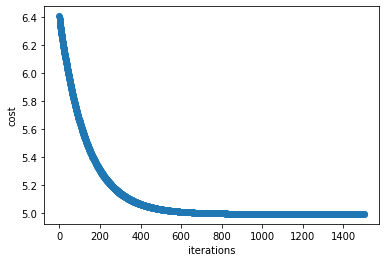

In [5]:
model.fit(X_train,Y_train,1500, lr = 0.02)

In [6]:
pred=[]
for i in range(0,20):
    pred.append(model.predict(X_test[i]))
    
    

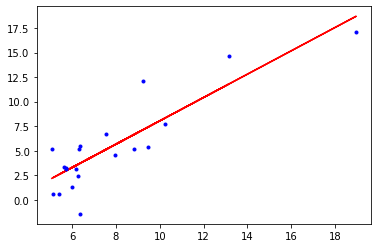

In [7]:
plt.plot(X_test, pred, "r-")
plt.plot(X_test, Y_test, "b.")
plt.show()

In [8]:
umse=model.EvaluatePerformance(pred,Y_test)
print(umse)

4.973897287386327


# Testing model on multivariate data :

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
murl=r"C:\Users\Hadeel\Desktop\4th year\4th year 1st term\Machine_Learning\Task_2\multivariateData.dat"
multidata =np.loadtxt(murl,delimiter=',')
X = multidata[:,0:2]
y = multidata[:,2]
sc = MinMaxScaler()
sc.fit(X)
X = sc.transform(X)
print(X.shape)

(47, 2)


In [10]:
y = multidata[:,2]
y=np.array([y])
y=y.T
for i in range(0,10):
    y[i]=float(y[i]/100)
print(y.shape)

(47, 1)


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(Y_train.shape , X_train.shape, X_test.shape,Y_test.shape)

(37, 1) (37, 2) (10, 2) (10, 1)


In [12]:
mmodel = Multivariate_LeaniarRegression_Model(X_train.shape[1])

Final cost value:  9253718370.694595


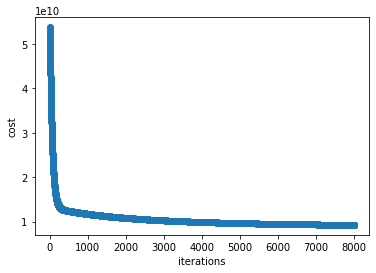

In [13]:
mmodel.fit(X_train,Y_train,8000, lr = 0.0059)

In [14]:
pred=[]
for i in range(0,10):
    p=float(mmodel.predict(X_test[i]))
    pred.append(p)


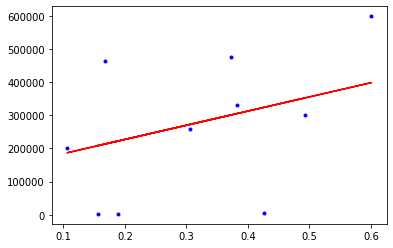

In [15]:
plt.plot(X_test[:,0], pred, "r-")
plt.plot(X_test[:,0], Y_test, "b.")
plt.show()

In [16]:
mmse=model.EvaluatePerformance(pred,Y_test)
print(mmse)

45717442082.13669


### i don't know why mmse is large although the line looks good